# Socio-Economical Analysis on different sectors (INDIA)
## Necessary Data Science Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Data-cleaning and preprocessing
#### Link Dataset (World Bank): https://api.worldbank.org/v2/en/country/IND?downloadformat=csv

In [2]:
# Provide the path to your CSV file
csv_file2 = "IBMZDATATHON2023_Dataset/IndiaIndicators.csv"

df = pd.read_csv(csv_file2)

In [4]:
new_df = df.iloc[:, 2:]
new_df = new_df.T
new_df.columns = new_df.iloc[0]
new_df = new_df.iloc[2:]  # This will remove the first row
# The following will remove the Indicators were there is more than 30% NaN entries
threshold = 0.70 * len(new_df)
df2 = new_df.dropna(axis=1, thresh=threshold)

# This will replace the NaN by 0's
df2 = df2.fillna(0)
column_headers = df2.columns

In [5]:
column_headers

Index(['Travel services (% of commercial service exports)',
       'Commercial service exports (current US$)',
       'Merchandise exports by the reporting economy (current US$)',
       'Merchandise exports to low- and middle-income economies in Middle East & North Africa (% of total merchandise exports)',
       'Merchandise exports to low- and middle-income economies outside region (% of total merchandise exports)',
       'Ores and metals exports (% of merchandise exports)',
       'Fuel exports (% of merchandise exports)',
       'Transport services (% of commercial service imports)',
       'Merchandise imports from low- and middle-income economies within region (% of total merchandise imports)',
       'Merchandise imports from low- and middle-income economies in South Asia (% of total merchandise imports)',
       ...
       'Grants, excluding technical cooperation (BoP, current US$)',
       'Net trade in goods and services (BoP, current US$)',
       'Current account balance 

#### Indicators that got selected

In [6]:
population = ["Urban population growth (annual %)",
            "Population, female (% of total population)",
            "Population, male (% of total population)",
            "Mobile cellular subscriptions (per 100 people)",
            "Net migration",
            "Urban population (% of total population)",
            "Rural population growth (annual %)",
            "Population, total"
            ]

populationGraphs = ["Population ages 75-79, male (% of male population)",
            "Population ages 65 and above (% of total population)",
            "Population ages 65 and above, female (% of female population)",
            "Population ages 60-64, male (% of male population)",
            "Population ages 50-54, male (% of male population)",
            "Population ages 30-34, male (% of male population)",
            "Population ages 15-64, male (% of male population)",
            "Population ages 15-19, male (% of male population)",
            "Population ages 05-09, male (% of male population)",
            "Population ages 0-14, male (% of male population)",
            "Population ages 00-04, male (% of male population)",
            "Population ages 80 and above, male (% of male population)",
            "Population ages 70-74, male (% of male population)",
            "Population ages 65-69, male (% of male population)",
            "Population ages 55-59, male (% of male population)",
            "Population ages 35-39, male (% of male population)",
            "Population ages 25-29, male (% of male population)",
            "Population ages 15-64 (% of total population)",
            "Population ages 15-64, female (% of female population)",
            "Population ages 10-14, male (% of male population)",
            "Population ages 0-14 (% of total population)",
            "Population ages 0-14, female (% of female population)",
            "Population ages 80 and above, female (% of female population)",
            "Population ages 70-74, female (% of female population)",
            "Population ages 65 and above, male",
            "Population ages 65-69, female (% of female population)",
            "Population ages 55-59, female (% of female population)",
            "Population ages 45-49, female (% of female population)",
            "Population ages 35-39, female (% of female population)",
            "Population ages 25-29, female (% of female population)",
            "Population ages 15-64, total",
            "Population ages 15-64, female",
            "Population ages 10-14, female (% of female population)",
            "Population ages 0-14, total",
            "Population ages 0-14, female"
            ]

In [7]:
health = ["Age dependency ratio (% of working-age population)",
        "Life expectancy at birth, female (years)",
        "Life expectancy at birth, male (years)",
        "Mortality rate, infant (per 1,000 live births)",
        "Death rate, crude (per 1,000 people)",
        "Adolescent fertility rate (births per 1,000 women ages 15-19)",
        "Number of infant deaths",
        "Life expectancy at birth, total (years)",
        "Birth rate, crude (per 1,000 people)",
        "Number of under-five deaths",
        "Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)"]


In [8]:
economic = ["Manufacturing, value added (% of GDP)",
            "Trade (% of GDP)",
            "GDP per capita (current LCU)",
            "Gross national expenditure (% of GDP)",
            "GNI (current US$)",
            "GDP per capita (constant LCU)",
            "Industry (including construction), value added (constant 2015 US$)",
            "Taxes on income, profits and capital gains (% of revenue)",
            "Lending interest rate (%)",
            "Domestic credit to private sector by banks (% of GDP)",
            "Tax revenue (% of GDP)",
            "Real interest rate (%)",
            "Foreign direct investments, net inflows (% of GDP)",
            "Net primary income (Net income from abroad) (current LCU)"
            ]

In [9]:
trade = ["Imports of goods and services (constant 2015 US$)",
        "Imports of goods and services (annual % growth)",
        "Exports of goods and services (constant 2015 US$)",
        "Merchandise trade (% of GDP)",
        "Merchandise imports from high-income economies (% of total merchandise imports)",
        "Exports of goods and services (% of GDP)",
        "Imports of goods and services (% of GDP)",
        "Imports of goods and services (current LCU)",
        "Imports of goods and services (constant LCU)",
        "Exports of goods and services (% of GDP)"]

In [10]:
agricultural = ["Agricultural raw materials exports (% of merchandise exports)",
                                "Agricultural land (sq. km)",
                                "Permanent cropland (% of land area)",
                                "Fertilizer consumption (% of fertilizer production)",
                                "Food imports (% of merchandise imports)"
                    ]

In [11]:
financial_aid= ["Net primary income (Net income from abroad) (current US$)",
                "Net official development assistance and official aid received (constant 2020 US$)",
                "Net official development assistance received (current US$)",
                "Net official development assistance and official aid received (current US$)",
                "Claims on central government (annual growth as % of broad money)",
                "Net bilateral aid flows from DAC donors, United Kingdom (current US$)",
                "Net bilateral aid flows from DAC donors, Total (current US$)",
                "Net bilateral aid flows from DAC donors, Italy (current US$)",
                "Net bilateral aid flows from DAC donors, Germany (current US$)",
                "Net ODA received (% of central government expense)",
                "Net ODA received (% of GNI)"]

In [12]:
education = ["Adjusted savings: education expenditure (current US$)",
             "School enrollment, primary, male (% gross)",
             "School enrollment, primary, female (% gross)",
             "Primary education, pupils",
             "Primary school starting age (years)",
             "School enrollment, primary (gross), gender parity index (GPI)",
             "Secondary education, duration (years)",
             "Primary education, duration (years)",
            "Adolescent fertility rate (births per 1,000 women ages 15-19)"]

In [13]:

def corrmatrix(selected_indicators, original_df):
    '''
    Returns a correlation matrix of a Dataframe with the data of the indicators we need and specified in the selected_indicators list
    '''
    filtered_df = original_df[selected_indicators]
    return filtered_df.corr()
    

# Correlations India
#### Computing the correlation matrices for specific domains in relation to some general indicators

- Health
- Sanitary
- Infrastructures
- Education
- Taxrates
- Willingness of Investments by the Government

We are using some general indicators to estimate if there is causality between two different indicators

In [14]:
# Basic indicators
corr0 = ["Mobile cellular subscriptions (per 100 people)", "Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)", "GDP per capita (current LCU)",
         "GNI (current US$)", "Taxes on income, profits and capital gains (% of revenue)", "Real interest rate (%)", "Urban population (% of total population)",
            "Rural population growth (annual %)"]

graph0 = ["Real interest rate (%)",  "Net primary income (Net income from abroad) (current LCU)", "Taxes on income, profits and capital gains (% of revenue)", "GNI (current US$)", "GDP per capita (current LCU)", "Expense (% of GDP)"]

# health
corr1 = ["Number of infant deaths", "Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)",
         "GDP per capita (current LCU)", 
         "Net primary income (Net income from abroad) (current LCU)",
         "Life expectancy at birth, total (years)",
         "Death rate, crude (per 1,000 people)",
         "Urban population (% of total population)"]

graph1 = ["Number of infant deaths", "Life expectancy at birth, female (years)",
         "Life expectancy at birth, male (years)"]

# Education

corr2 = ["Adjusted savings: education expenditure (current US$)", "Primary education, pupils", "Adolescent fertility rate (births per 1,000 women ages 15-19)",
         "GDP per capita (current LCU)", "Urban population (% of total population)", "Rural population growth (annual %)", "Secondary education, duration (years)"]
         
graph2 = ["School enrollment, primary, male (% gross)", "School enrollment, primary, female (% gross)", "Adjusted savings: education expenditure (current US$)","Secondary education, duration (years)"]


# Industry/economy
corr3 = ["Manufacturing, value added (% of GDP)", "Communications, computer, etc. (% of service exports, BoP)",
         "GDP per capita (current LCU)", "Exports of goods and services (% of GDP)", "Foreign direct investments, net inflows (% of GDP)"]

graph3_1 = ["Transport services (% of service exports, BoP)", "Insurance and financial services (% of service exports, BoP)" ,
            "Travel services (% of service exports, BoP)", "Communications, computer, etc. (% of service exports, BoP)", "Service exports (BoP, current US$)"]

graph3 = ["Food imports (% of merchandise imports)", "Manufacturing, value added (% of GDP)", "GDP per capita (current LCU)", "Net primary income (Net income from abroad) (current LCU)", 
          "Communications, computer, etc. (% of service exports, BoP)"]

graph3_2 = ["Exports of goods and services (% of GDP)", "Imports of goods and services (% of GDP)", "GDP per capita (current LCU)"]


In [15]:
df2[corr0]

Indicator Name,Mobile cellular subscriptions (per 100 people),"Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)",GDP per capita (current LCU),GNI (current US$),"Taxes on income, profits and capital gains (% of revenue)",Real interest rate (%),Urban population (% of total population),Rural population growth (annual %)
1960,0.000000,0.000000,395.404851,3.687868e+10,0.0,0.000000,17.924,0.000000
1961,0.000000,0.000000,409.379134,3.902664e+10,0.0,0.000000,18.032,2.173035
1962,0.000000,0.000000,429.889422,4.193468e+10,0.0,0.000000,18.218,2.084514
1963,0.000000,0.000000,482.452684,4.818672e+10,0.0,0.000000,18.405,2.080160
1964,0.000000,0.000000,549.940442,5.617579e+10,0.0,0.000000,18.595,2.068063
...,...,...,...,...,...,...,...,...
2019,83.252862,7.358739,145350.428091,2.808368e+12,0.0,6.894875,34.472,0.353055
2020,82.621059,7.358739,142008.807371,2.635666e+12,0.0,4.203910,34.926,0.259976
2021,81.988934,0.000000,166749.180644,3.087256e+12,0.0,0.147236,35.393,0.076984
2022,80.648577,0.000000,191957.959627,3.317300e+12,0.0,0.229815,35.872,-0.063795


# General Economic Indicators of India
#### One can see the strong correlation between the Indices, which is "normal" for the developpment of an emerging country
You can see the plots of:
- The GNI (current USD)
- GDP per capita (current LCU)
- Exports of goods and services (% of GDP)
- Population, total

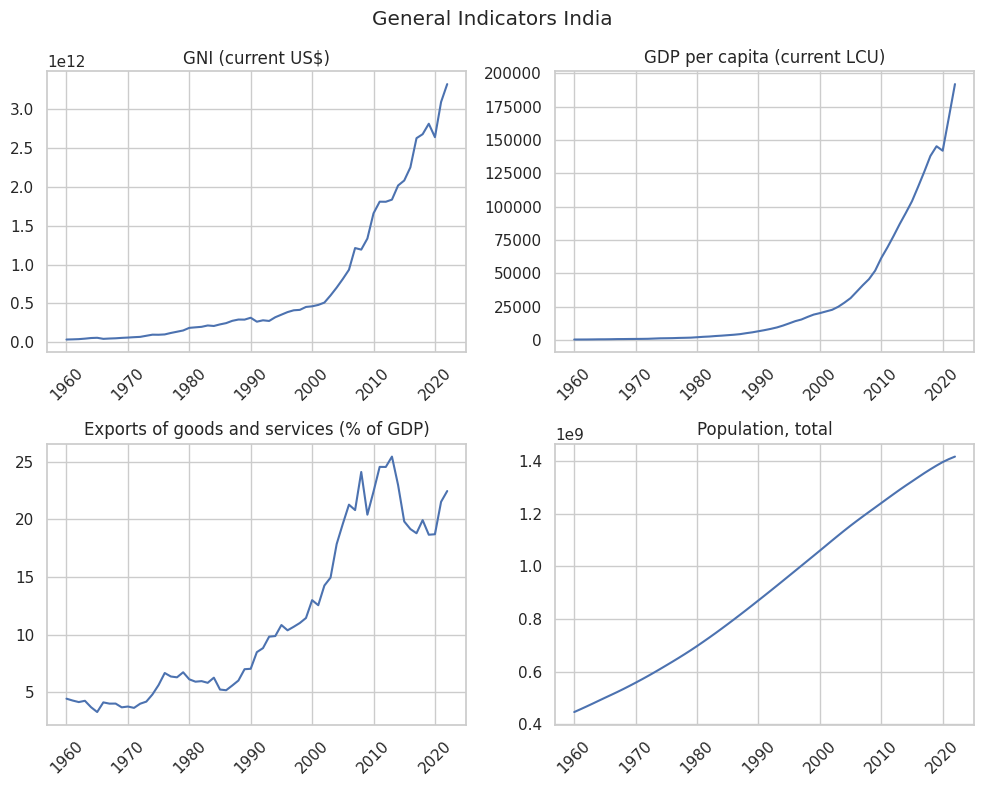

In [101]:
import matplotlib.pyplot as plt

# Your data
x = df2.index[:-1]
y1 = df2["GNI (current US$)"][:-1]
y2 = df2["GDP per capita (current LCU)"][:-1]
y3 = df2["Exports of goods and services (% of GDP)"][:-1]
y4 = df2["Population, total"][:-1]


# Create a figure and a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot data on each subplot
axes[0, 0].plot(x, y1)
axes[0, 0].set_title('GNI (current US$)')

axes[0, 1].plot(x, y2)
axes[0, 1].set_title('GDP per capita (current LCU)')

# Mask zero values and make lines transparent
mask = y3 == 0
y3_copy = y3.copy()
y3_copy[mask] = None  # Replace zeros with None for transparency
axes[1, 0].plot(x, y3_copy)
axes[1, 0].set_title('Exports of goods and services (% of GDP)')

axes[1, 1].plot(x, y4)
axes[1, 1].set_title('Population, total')

# Set x-axis ticks to show every 10th year
for ax in axes.flat:
    ax.set_xticks(x[::10])
    ax.set_xticklabels(x[::10], rotation=45)  # Rotate labels if needed

# Add a title for the entire plot
fig.suptitle('General Indicators India')

# Adjust the layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()



# Health and Population
As some may see, there are some clear correlations between the overall wealth of the country, 
its sanitary conditions as well as its living sitaution, respectively the health aspect. This can be seen by the overall
death rate but also the conditions of giving birth and provide for a child/infant. Another aspect is the fact that people are more and more moving into urban arias,
which concludes proximity to sanitary and medical access.

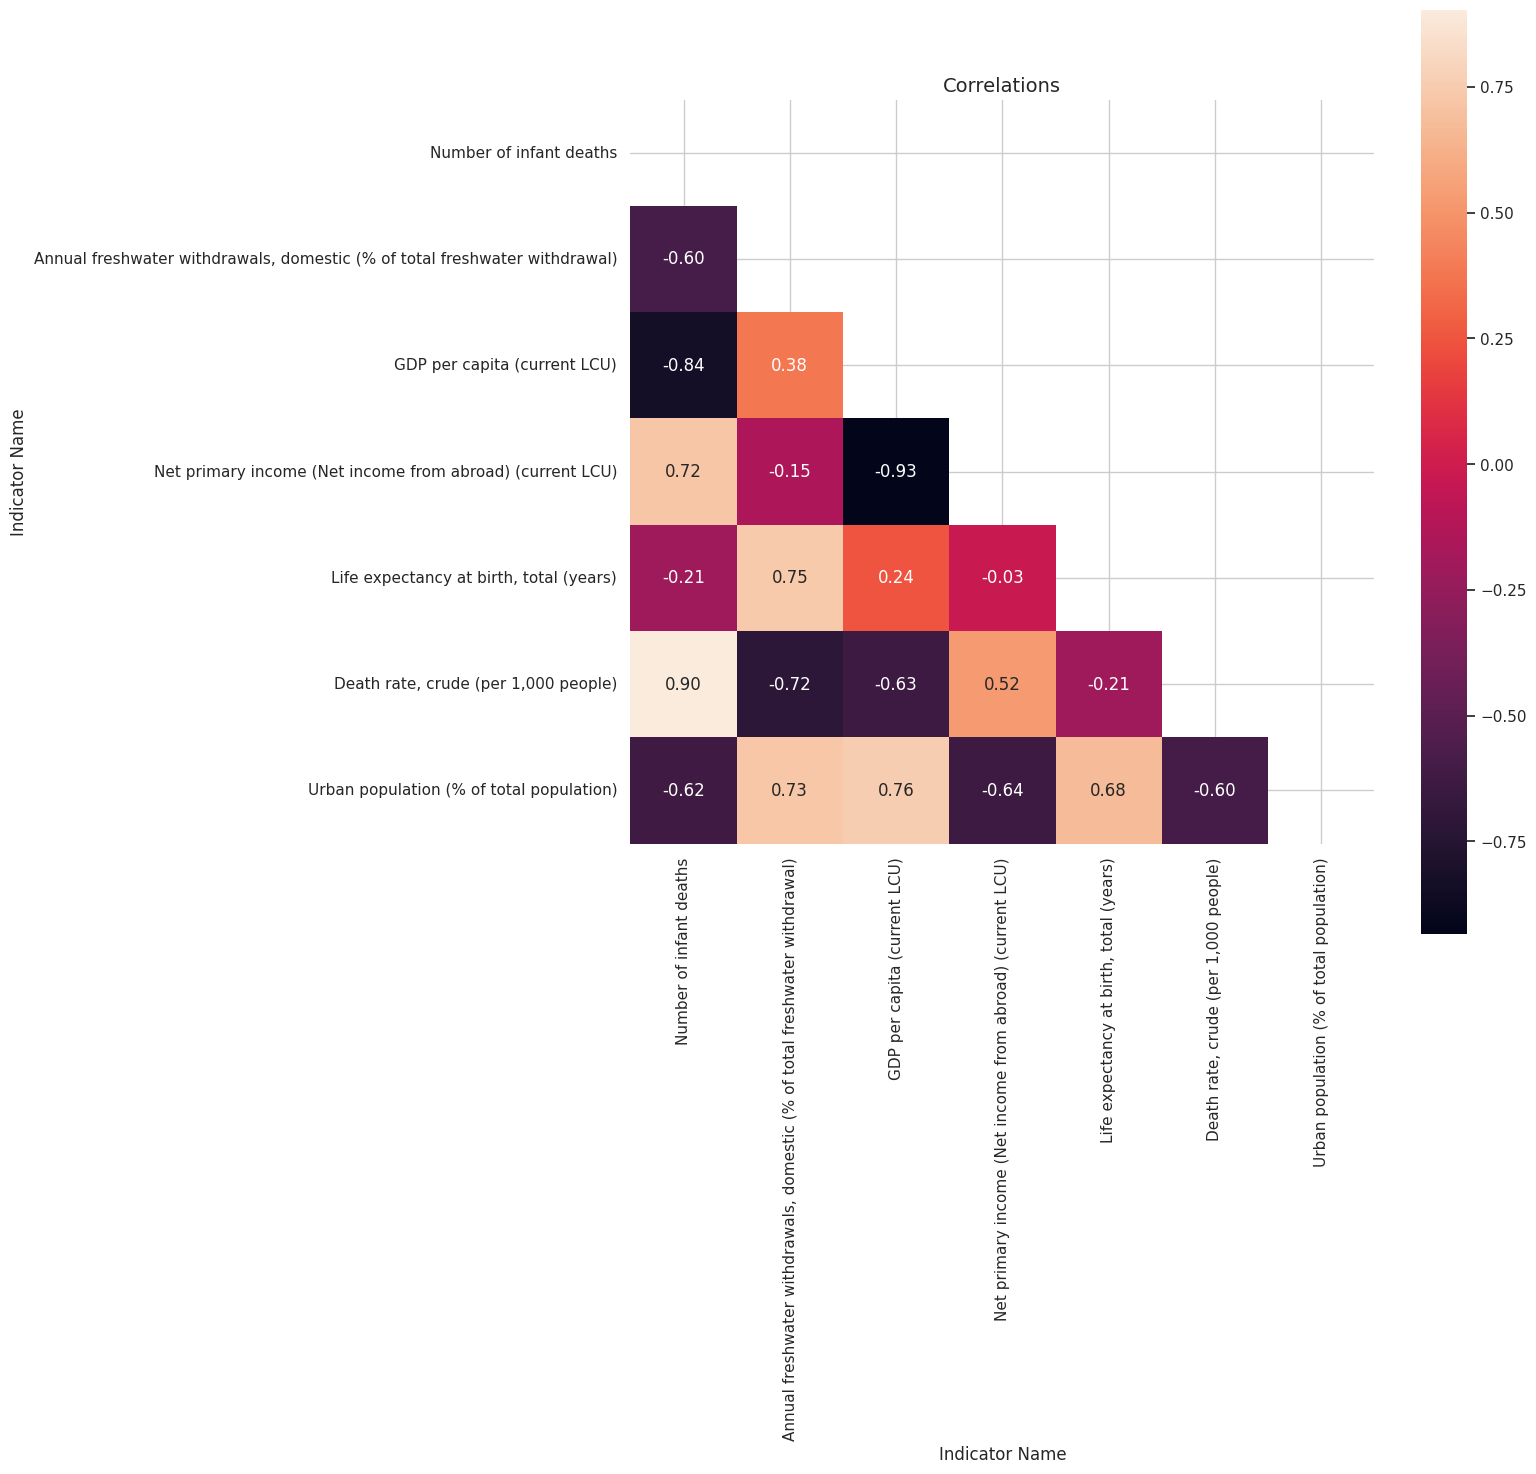

In [113]:
corr1 = corrmatrix(corr1, df2)

# only show lower triangle
mask = np.zeros_like(corr1)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(corr1, mask=mask, square=True, annot=True, fmt='.2f',
                 cbar=True,
                 ax=ax)
title = ax.set_title('Correlations', size=14)

# Education
Education can be considred as one of the most important aspect of a nation which influences and trains the brain of a society.
Investing in Education leads to many advantages in the community of a nation. We can see that the movements of for example teenage pregnancies
are anti-correlative to each other, meaning the amount of teenage pregnancies decreases when the level of education increases, since children will
by occupied with school and learn about sexuality, respectively safe-sex for example. It is also evident that the quantity of pupils increases with the increasement of the population in the urban area relative to the rural area, since school are mainly located in larger villages/cities.

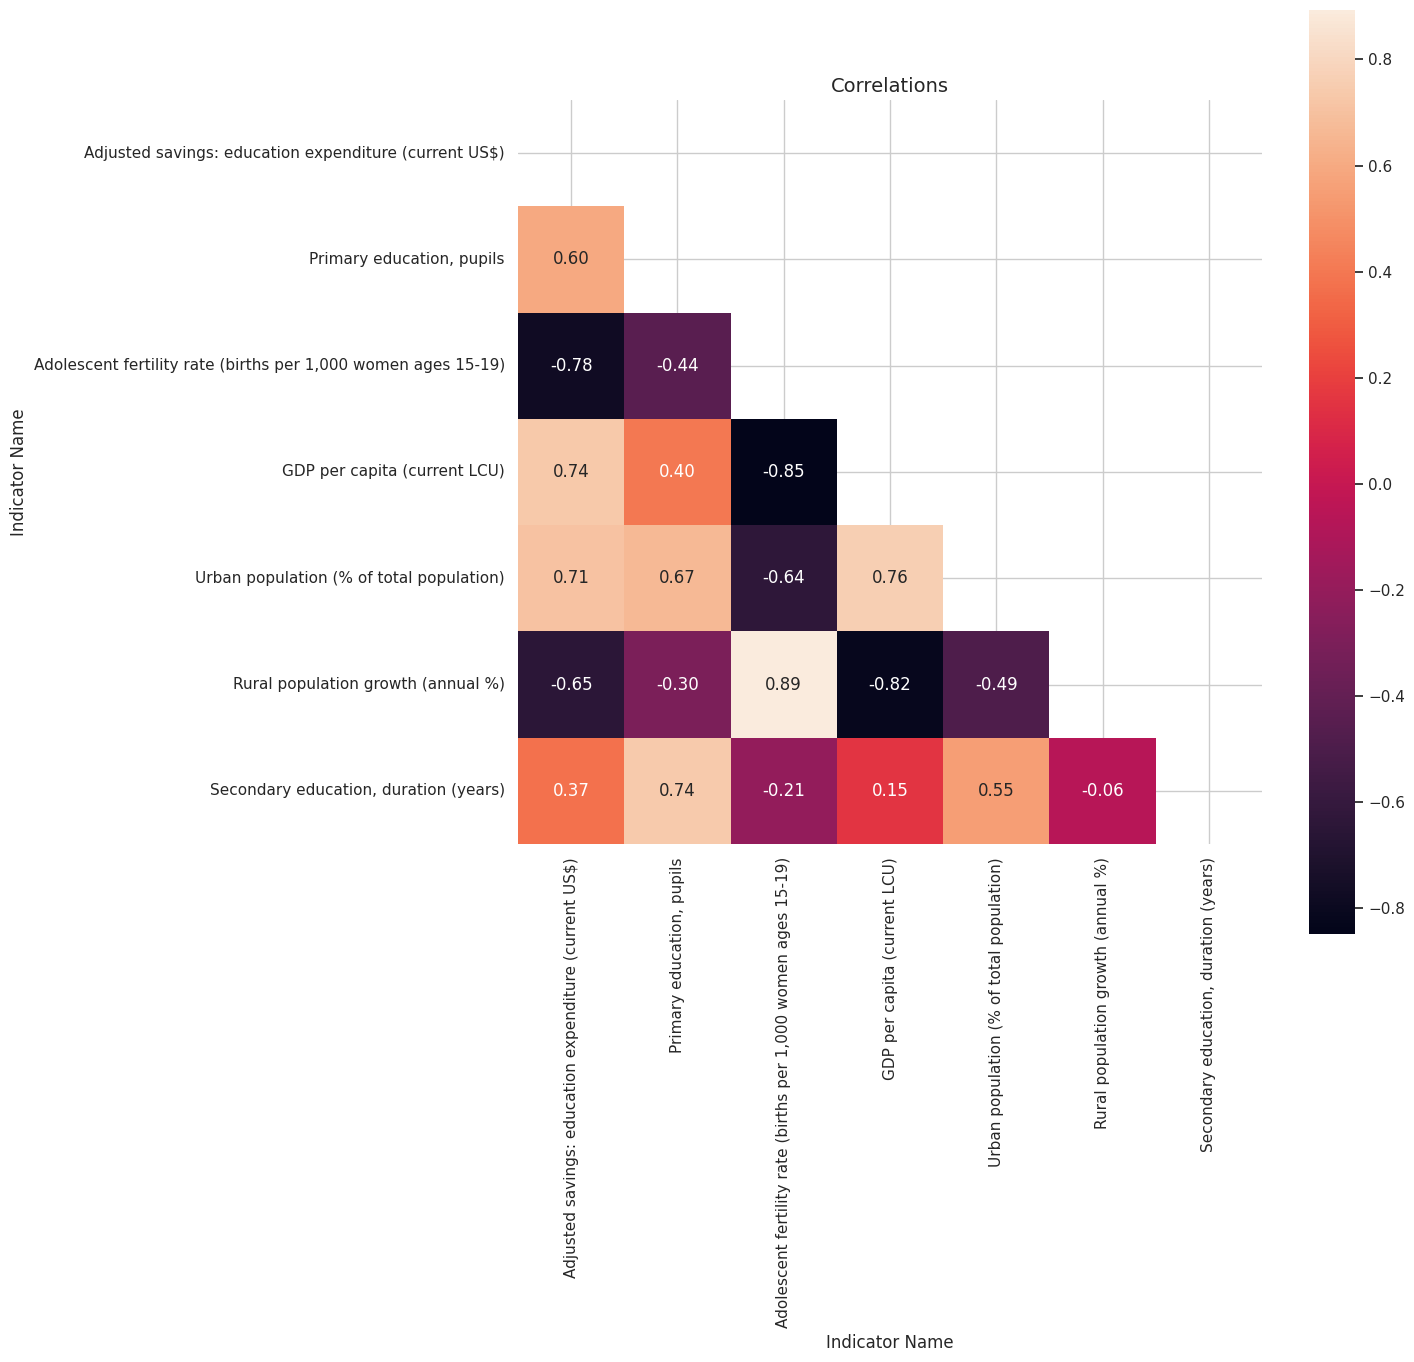

In [116]:
corr2 = corrmatrix(corr2, df2)

# only show lower triangle
mask = np.zeros_like(corr2)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(corr2, mask=mask, square=True, annot=True, fmt='.2f',
                 cbar=True,
                 ax=ax)
title = ax.set_title('Correlations', size=14)

## Equality in Education
The following shows a great example how equality in education adapted quickly, such that the traditional "role" image of a woman
was revolutionized to the image of an educated independent woman. Notice that the female school enrolements even surpass the male ones.

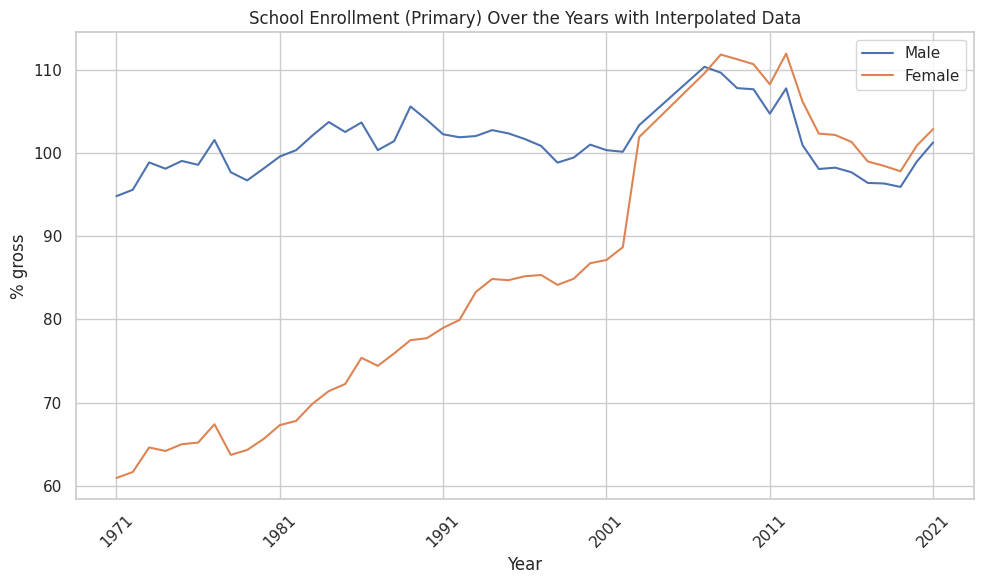

In [128]:
x = df2.index[11:-2]
y1 = df2["School enrollment, primary, male (% gross)"][11:-2]
y2 = df2["School enrollment, primary, female (% gross)"][11:-2]

y1_interpolated = np.interp(x, x[y1 != 0], y1[y1 != 0])
y2_interpolated = np.interp(x, x[y2 != 0], y2[y2 != 0])


fig, ax = plt.subplots(figsize=(10, 6))


ax.plot(x, y1_interpolated, label="Male")
ax.plot(x, y2_interpolated, label="Female")

ax.set_xticks(x[::10])
ax.set_xticklabels(x[::10], rotation=45)
ax.set_xlabel('Year')
ax.set_ylabel('% gross')

# Add a legend
ax.legend()

# Add a title for the entire plot
plt.title('School Enrollment (Primary) Over the Years (with interpolated Data)')

# Show the plot
plt.tight_layout()
plt.show()


# Industry and Economy


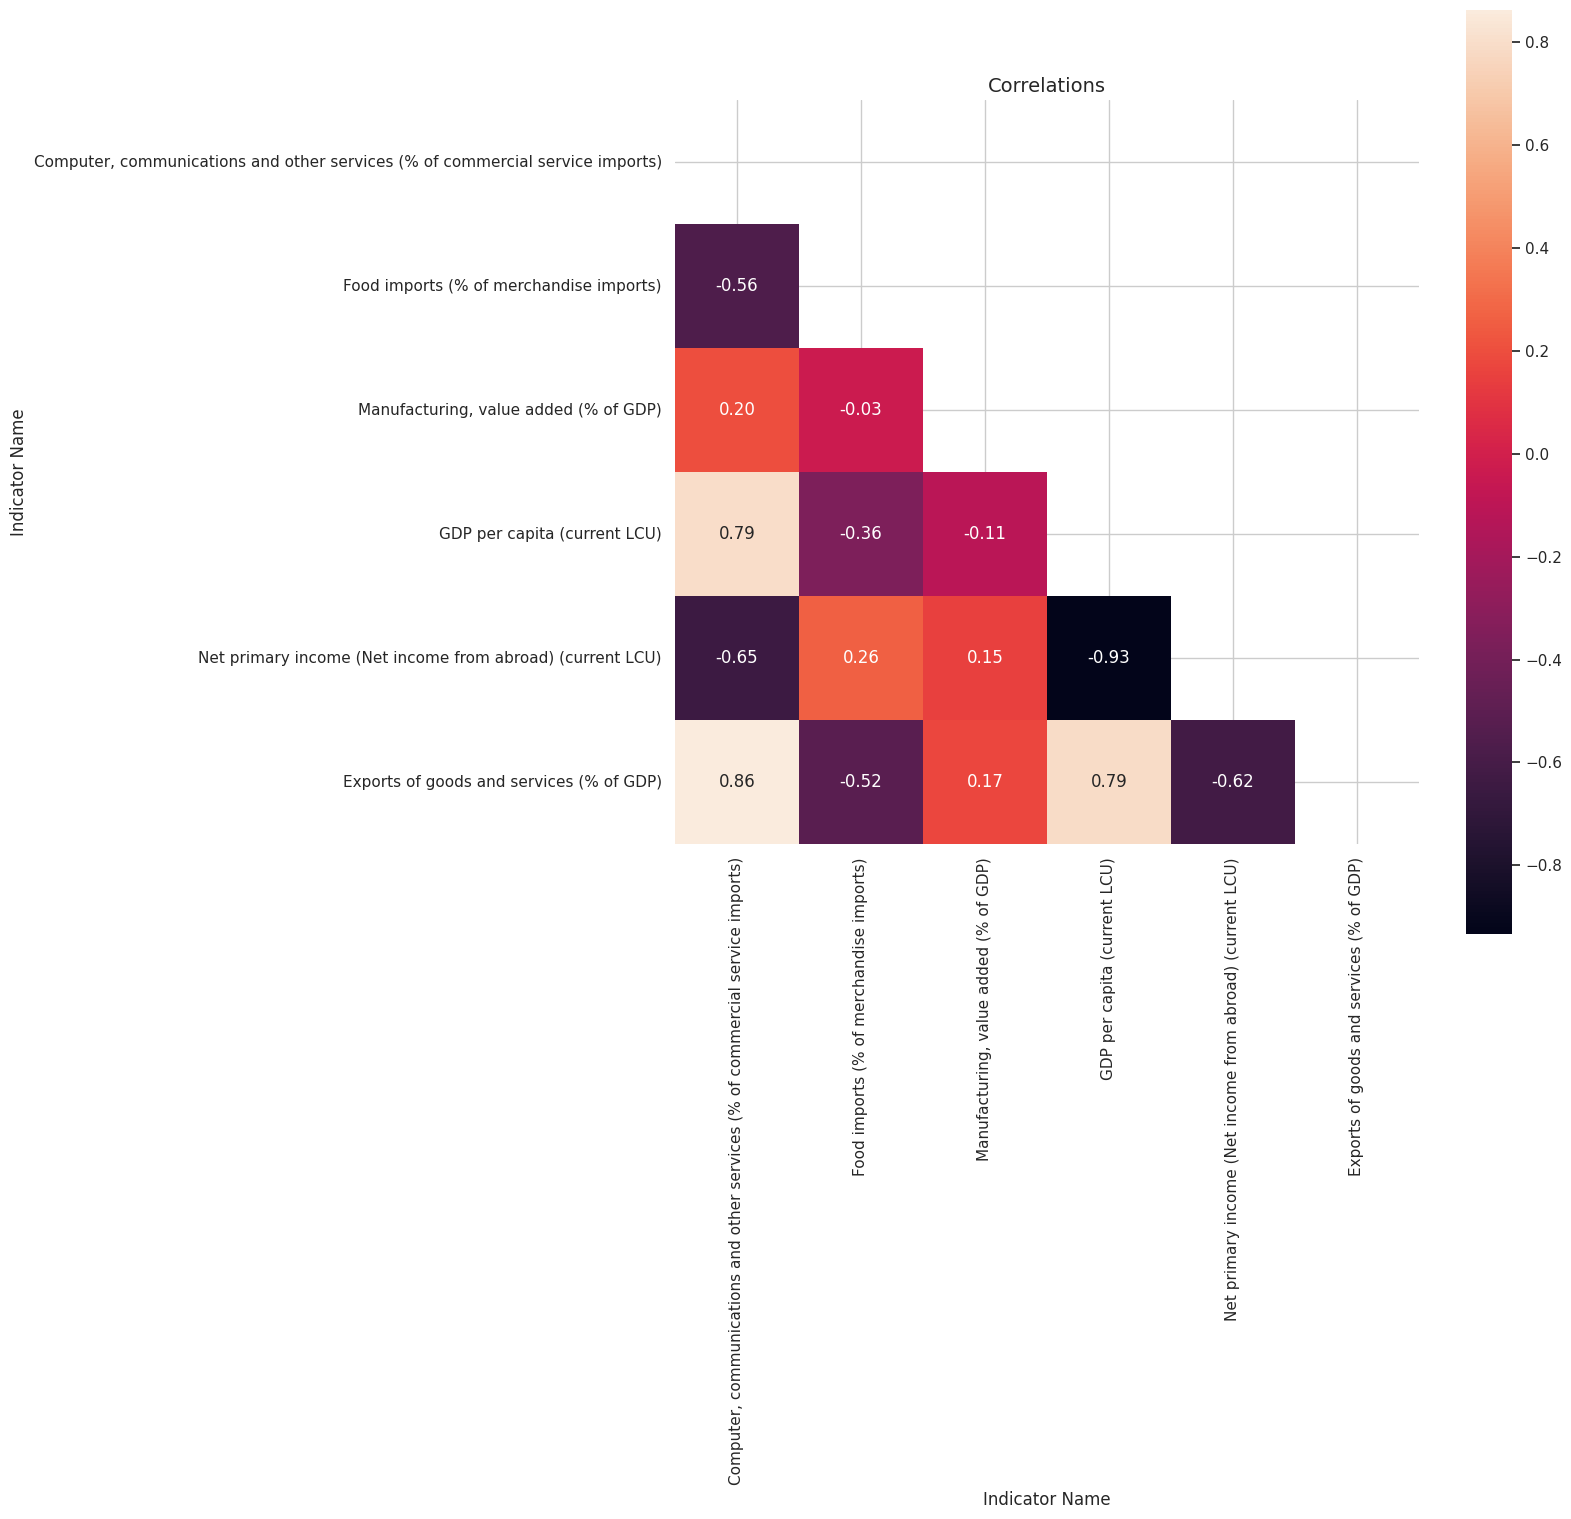

In [137]:
corr3 = corrmatrix(corr3, df2)

# only show lower triangle
mask = np.zeros_like(corr3)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(corr3, mask=mask, square=True, annot=True, fmt='.2f',
                 cbar=True,
                 ax=ax)
title = ax.set_title('Correlations', size=14)

## Service Sector
The following stackplot shows the distribution in the service sector in India. We can see a major increase in the field of Information
Technology, where India became one of the global players with China

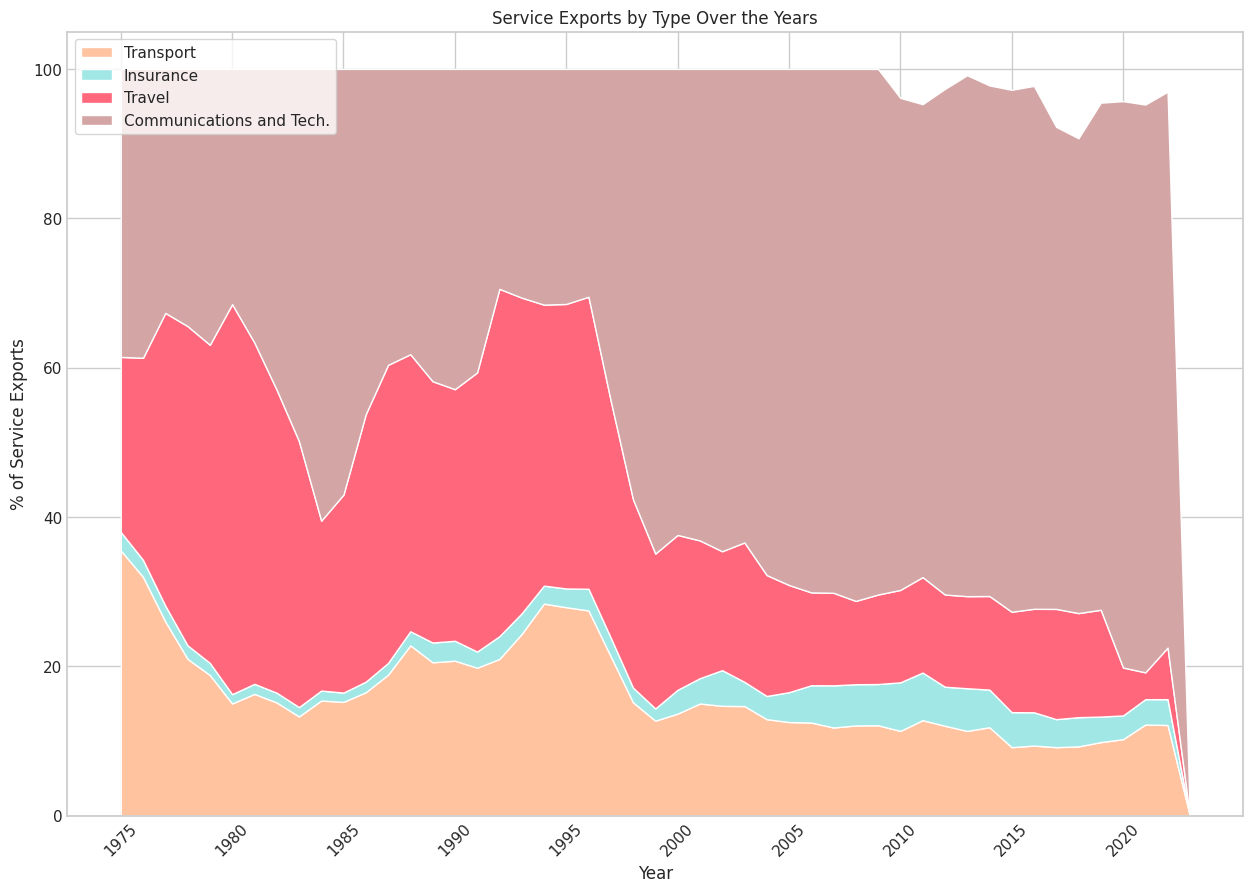

In [166]:
x = df2.index[15:]
transport = df2["Transport services (% of service exports, BoP)"][15:]
insurance = df2["Insurance and financial services (% of service exports, BoP)"][15:]
travel = df2["Travel services (% of service exports, BoP)"][15:]
communications = df2["Communications, computer, etc. (% of service exports, BoP)"][15:]

fig, ax = plt.subplots(figsize=(12, 8))

ax.stackplot(x, transport, insurance, travel, communications, labels=["Transport", "Insurance", "Travel", "Communications and Tech."], colors=['#FFC3A0', '#A0E7E5', '#FF677D', '#D4A5A5'])
x_ticks = x[::5]
x_tick_labels = x_ticks
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_tick_labels, rotation=45)

ax.set(xlabel='Year', ylabel='% of Service Exports')
ax.legend(loc='upper left')

plt.title('Service Exports by Type Over the Years')
plt.show()



## Import Export Ratio
The following plot shows explicetly the import/export rate of India which is quite balaced. We can also see a correlation between the increase
of import and export and the increase of the GDP.

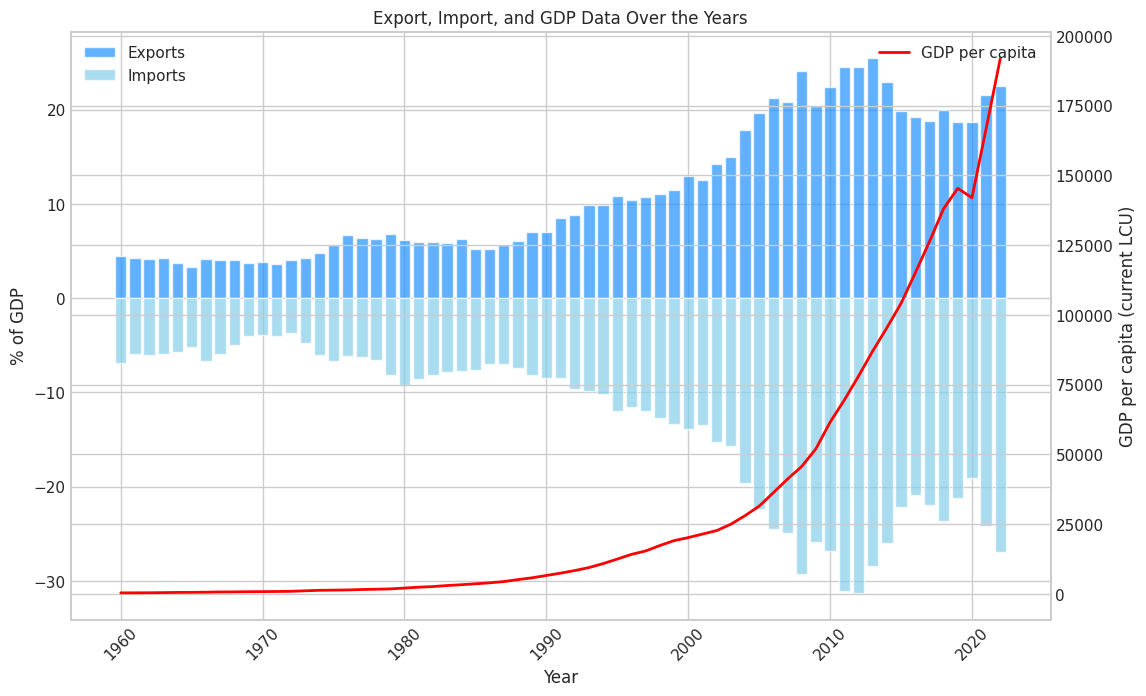

In [175]:
x = df2.index[:63]
exports = df2["Exports of goods and services (% of GDP)"][:63]
imports = df2["Imports of goods and services (% of GDP)"][:63]
gdp = df2["GDP per capita (current LCU)"][:63]

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(x, exports, color='dodgerblue', alpha=0.7, label='Exports')
ax1.bar(x, -imports, color='skyblue', alpha=0.7, label='Imports')

ax2 = ax1.twinx()
ax2.plot(x, gdp, color='red', label='GDP per capita', linewidth=2)

ax1.set_xlabel('Year')
ax1.set_ylabel('% of GDP')
ax2.set_ylabel('GDP per capita (current LCU)')
plt.title('Export, Import, and GDP Data Over the Years')


ax1.set_xticks(x[::10])
ax1.set_xticklabels(x[::10], rotation=45)

ax1.legend(loc='upper left', frameon=False)
ax2.legend(loc='upper right', frameon=False)

plt.show()



In [170]:
df2[graph3_2]

Indicator Name,Exports of goods and services (% of GDP),Imports of goods and services (% of GDP),GDP per capita (current LCU)
1960,4.463156,6.833677,395.404851
1961,4.303586,5.957576,409.379134
1962,4.168975,6.031815,429.889422
1963,4.280503,5.906834,482.452684
1964,3.725551,5.684998,549.940442
...,...,...,...
2019,18.664265,21.241139,145350.428091
2020,18.705247,19.098878,142008.807371
2021,21.514389,24.153295,166749.180644
2022,22.449438,26.923656,191957.959627


# FURTHER ANALYSIS/HEATMAPS FOR ADDITIONAL COUNTRIES

## Testing Code and Misc.

### Filter "unnecessary" countries

In [16]:
'''
import pandas as pd

# Load the original CSV file
input_file = "IBMZDATATHON2023_Dataset/WorldBankDevelopmentIndicators.csv"
df = pd.read_csv(input_file) # df = DataFrame

# Filter rows where the 'country' column is 'India' or 'Bangladesh'
filtered_df = df[df['country'].isin(['India', 'Bangladesh'])]

# Specify the output CSV file
output_file = "IBMZDATATHON2023_Dataset/WBDIcountryFilter.csv"

# Write the filtered data to a new CSV file
filtered_df.to_csv(output_file, index=False)
'''
pass

### Filter unnecessary columns

In [17]:
'''
import pandas as pd

# Load the original CSV file
input_file = "IBMZDATATHON2023_Dataset/WBDIcountryFilter.csv"
df = pd.read_csv(input_file)

# List of column names to remove (replace with your array)
columns_to_remove = ["agricultural_land%",
"forest_land%",
"land_area",
"avg_precipitation",
"renewvable_energy_consumption%",
"electric_power_consumption",
"CO2_emissions",
"other_greenhouse_emissions",
"population_density",
"inflation_annual%",
"real_interest_rate",
"risk_premium_on_lending",
"central_government_debt%",
"tax_revenue%",
"expense%",
"government_effectiveness_estimate",
"government_effectiveness_std",
"human_capital_index",
"doing_business",
"time_to_get_operation_license",
"statistical_performance_indicators",
"logistic_performance_index,",
"political_stability_estimate",
"political_stability_std",
"rule_of_law_std",
"regulatory_quality_estimate",
"regulatory_quality_std",
"gini_index",
"voice_and_accountability_estimate",
"voice_and_accountability_std",
"international_homicides"]

# Remove columns that match the array
df = df.drop(columns=columns_to_remove, errors="ignore")

# Calculate the threshold for missing data
missing_threshold = 0.60 * len(df)

# Remove columns with more than 60% missing data
df = df.dropna(thresh=missing_threshold, axis=1)

# Specify the output CSV file
output_file = "IBMZDATATHON2023_Dataset/WBDIheatmapsimplified.csv"

# Write the filtered data to a new CSV file
df.to_csv(output_file, index=False)

print("Filtered data written to", output_file)
'''
pass

### Heatmaps - Setup

### Heatmap World Bank Development Indicators - India

Heatmap for correlation from World Bank Development Indicators dataset, filtered to remove unimportant columns

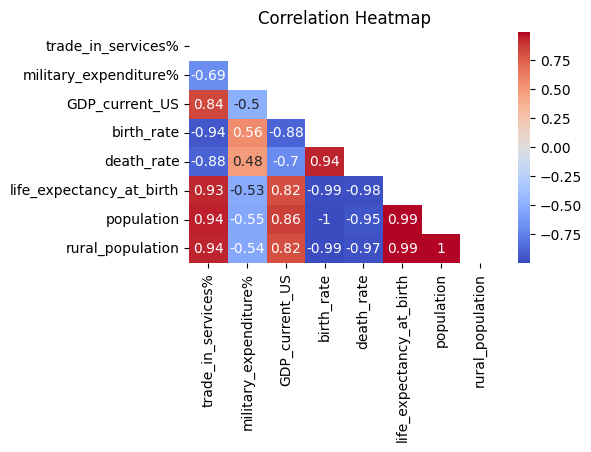

In [18]:
df = pd.read_csv("IBMZDATATHON2023_Dataset/WBDIheatmapsimplified.csv")
df = df[df['country'] == 'India']

corr = df.corr()

# Create a mask for the upper-right triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a heatmap of the correlation matrix
plt.figure(figsize=(5, 3))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Heatmap World Bank Development Indicators - Bangladesh

Heatmap for correlation from World Bank Development Indicators dataset, filtered to remove unimportant columns

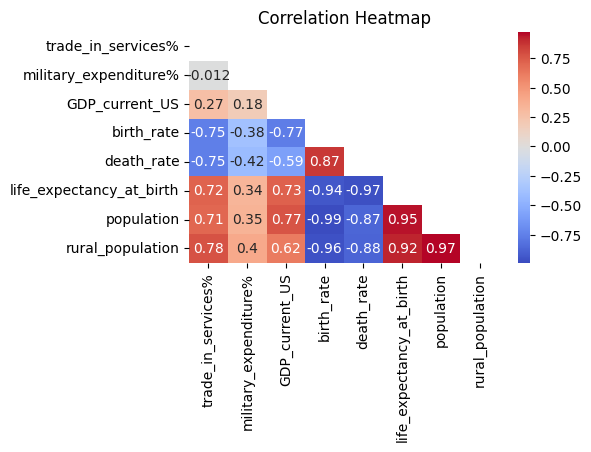

In [19]:
df = pd.read_csv("IBMZDATATHON2023_Dataset/WBDIheatmapsimplified.csv")
df = df[df['country'] == 'Bangladesh']

corr = df.corr()

# Create a mask for the upper-right triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a heatmap of the correlation matrix
plt.figure(figsize=(5, 3))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Heatmap Oxford Dataset - Maliwi

Heatmap for correlation from Oxford dataset, filtered to remove unimportant columns as well as other processing, commented in code

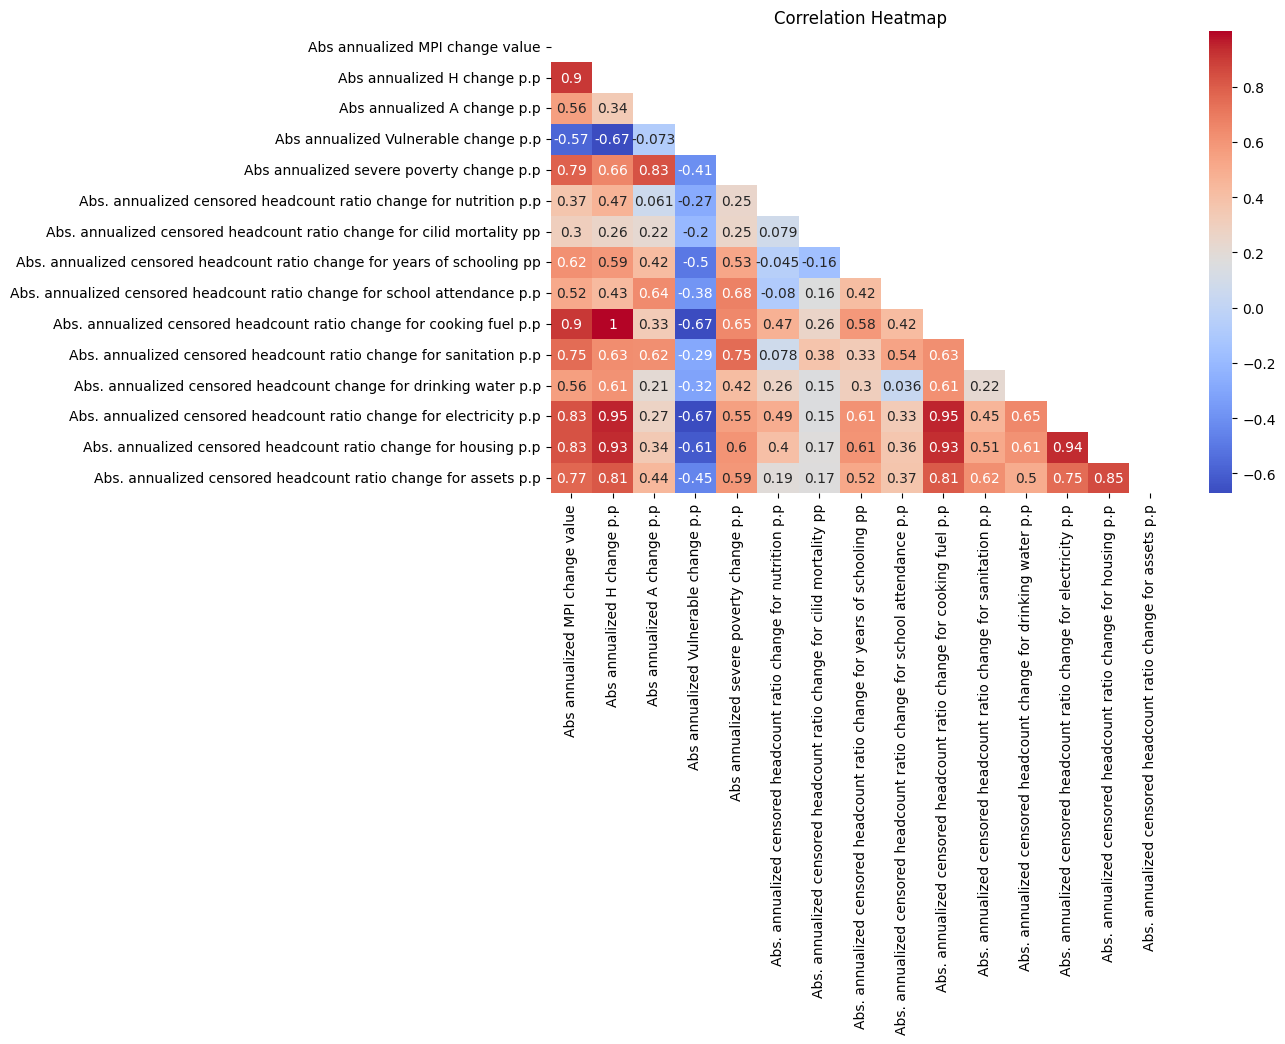

In [22]:
df = pd.read_csv("IBMZDATATHON2023_Dataset/OXindexes.csv")

# Array of required columns
columns_to_keep = ["Abs annualized MPI change value",
                "Abs annualized H change p.p",
                "Abs annualized A change p.p",
                "Abs annualized Vulnerable change p.p",
                "Abs annualized severe poverty change p.p",
                "Abs. annualized censored headcount ratio change for nutrition p.p",
                "Abs. annualized censored headcount ratio change for cilid mortality pp",
                "Abs. annualized censored headcount ratio change for years of schooling pp",
                "Abs. annualized censored headcount ratio change for school attendance p.p",
                "Abs. annualized censored headcount ratio change for cooking fuel p.p",
                "Abs. annualized censored headcount ratio change for sanitation p.p",
                "Abs. annualized censored headcount change for drinking water p.p",
                "Abs. annualized censored headcount ratio change for electricity p.p",
                "Abs. annualized censored headcount ratio change for housing p.p",
                "Abs. annualized censored headcount ratio change for assets p.p"#,
                  ]

# Array of columns required to be converted from String to Float due to commas being present
cols_to_convert = [
                "t1 Total share of pop.",
                "t0 Total share of pop.",
                "t1 Total pop. Thousands",
                "t0 Total pop. Thousands",
                "t1 Total pop. Year",
                "t0 Total pop. Year",
                "t1 MPI poor people Thousands",
                "t0 MPI poor people Thousands",
                "t1 Vulnerable people Thousands",
                "t0 Vulnerable people Thousands",
                "t1 MPI severe poverty Thousands",
                "t0 MPI severe poverty Thousands"]

# Converter Function
def custom_converter(value):
    if ',' in str(value):
        # Remove commas using regex and convert to float
        cleaned_value = re.sub(r',', '', value)
        return float(cleaned_value)
    else:
        return float(value)

# For loop converting each value in respective columns
for i in cols_to_convert:
    df[i] = df[i].apply(custom_converter)

# Apply pandas numeric conversion to columns to keep
df[columns_to_keep] = df[columns_to_keep].apply(pd.to_numeric, errors='coerce')

# Calculate and annualize (/5) the change in population statistics
df["Abs annualized Total share of pop. change"] = (df["t1 Total share of pop."] - df["t0 Total share of pop."]) / 5
df["Abs annualized Total pop. Thousands change"] = (df["t1 Total pop. Thousands"] - df["t0 Total pop. Thousands"]) / 5
df["Abs annualized Total pop. Year change"] = (df["t1 Total pop. Year"] - df["t0 Total pop. Year"]) / 5
df["Abs MPI poor people Thousands change"] = (df["t1 MPI poor people Thousands"] - df["t0 MPI poor people Thousands"]) / 5
df["Abs Vulnerable people Thousands change"] = (df["t1 Vulnerable people Thousands"] - df["t0 Vulnerable people Thousands"]) / 5
df["Abs MPI severe poverty Thousands change"] = (df["t1 MPI severe poverty Thousands"] - df["t0 MPI severe poverty Thousands"]) / 5

# Remove all columns except those to keep
df = df.loc[:, columns_to_keep]


corr = df.corr()

# Create a mask for the upper-right triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

^ Where H = Multidimensional Headcount Ratio | A = Intensity of Poverty